# Leave-one-MOA-out analysis
- Import feature vecs
- Plot UMAP
- Plot cosine similarity
- Compute distance to centroids (see Morphoscreen paper)

In [1]:
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import manifold, decomposition, metrics


In [9]:
def get_pca(data, n_components=2):
    pca = decomposition.PCA(n_components=n_components)
    pca_data = pca.fit_transform(data)
    # print('Explained variance', pca.explained_variance)
    return pca_data

def get_files_from_replicate(moa, train_rep, test_rep):
    path_pattern = f'../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_{train_rep}/dropped_{moa}/Plate_{test_rep}/'
    print(path_pattern)
    path = glob(path_pattern)[0]

    feat_vecs = np.loadtxt(os.path.join(path, 'feat_vecs.txt'))
    labels = np.loadtxt(os.path.join(path, 'labels.txt'))
    preds = np.loadtxt(os.path.join(path, 'preds.txt'))
    return feat_vecs, labels, preds

def index(input_maps, input_choices):
    "Returns boolean list to index array"
    idx_list_ = []
    for maps, choices in zip(input_maps, input_choices):    
        idx_list_.append(np.logical_or.reduce([np.array(maps) == c for c in choices]))
            
    return np.logical_and.reduce(idx_list_)
    
def get_umap(data, n_components=3, n_neighbors=400, min_dist=1., metric='cosine'):
    import umap
    umap_ = umap.UMAP(n_components=n_components, random_state=1, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
    # umap_ = umap.UMAP(n_components=n_components)
    umap_data = umap_.fit_transform(data)
    return umap_data

def plot_representations(data, labels, classes, save_name='umap.svg'):
    import matplotlib as mpl
    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    cmap_a = mpl.colormaps['tab20']

    classes_ = classes

    classes_from_labels = [(classes[int(l)], l) for l in np.unique(labels)]

    num_l = min(len(np.unique(labels)), 20)

    handles = []
    for c_l in classes_from_labels:
        c, l = c_l
        handles.append(mpatches.Patch(color=cmap_a(int(l % num_l)), label=c))

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0], data[:, 1], s=50, c=[cmap_a(int(l % num_l)) for l in labels], edgecolor='grey', alpha=0.5)

    plt.xticks([])
    plt.yticks([])
    
    legend = ax.legend(handles=handles, frameon=False)
    # plt.savefig(save_name)
    plt.show()

In [10]:
classes = ['Avibactam_0.125xIC50', 'Avibactam_0.25xIC50', 'Avibactam_0.5xIC50', 'Avibactam_1xIC50', 'Aztreonam_0.125xIC50', 'Aztreonam_0.25xIC50', 'Aztreonam_0.5xIC50', 'Aztreonam_1xIC50', 'Cefepime_0.125xIC50', 'Cefepime_0.25xIC50', 'Cefepime_0.5xIC50', 'Cefepime_1xIC50', 'Cefsulodin_0.125xIC50', 'Cefsulodin_0.25xIC50', 'Cefsulodin_0.5xIC50', 'Cefsulodin_1xIC50', 'Ceftriaxone_0.125xIC50', 'Ceftriaxone_0.25xIC50', 'Ceftriaxone_0.5xIC50', 'Ceftriaxone_1xIC50', 'Chloramphenicol_0.125xIC50', 'Chloramphenicol_0.25xIC50', 'Chloramphenicol_0.5xIC50', 'Chloramphenicol_1xIC50', 'Ciprofloxacin_0.125xIC50', 'Ciprofloxacin_0.25xIC50', 'Ciprofloxacin_0.5xIC50', 'Ciprofloxacin_1xIC50', 'Clarithromycin_0.125xIC50', 'Clarithromycin_0.25xIC50', 'Clarithromycin_0.5xIC50', 'Clarithromycin_1xIC50', 'Clavulanate_0.125xIC50', 'Clavulanate_0.25xIC50', 'Clavulanate_0.5xIC50', 'Clavulanate_1xIC50', 'Colistin_0.125xIC50', 'Colistin_0.25xIC50', 'Colistin_0.5xIC50', 'Colistin_1xIC50', 'DMSO', 'Doxycycline_0.125xIC50', 'Doxycycline_0.25xIC50', 'Doxycycline_0.5xIC50', 'Doxycycline_1xIC50', 'Kanamycin_0.125xIC50', 'Kanamycin_0.25xIC50', 'Kanamycin_0.5xIC50', 'Kanamycin_1xIC50', 'Levofloxacin_0.125xIC50', 'Levofloxacin_0.25xIC50', 'Levofloxacin_0.5xIC50', 'Levofloxacin_1xIC50', 'Mecillinam_0.125xIC50', 'Mecillinam_0.25xIC50', 'Mecillinam_0.5xIC50', 'Mecillinam_1xIC50', 'Meropenem_0.125xIC50', 'Meropenem_0.25xIC50', 'Meropenem_0.5xIC50', 'Meropenem_1xIC50', 'Norfloxacin_0.125xIC50', 'Norfloxacin_0.25xIC50', 'Norfloxacin_0.5xIC50', 'Norfloxacin_1xIC50', 'PenicillinG_0.125xIC50', 'PenicillinG_0.25xIC50', 'PenicillinG_0.5xIC50', 'PenicillinG_1xIC50', 'PolymyxinB_0.125xIC50', 'PolymyxinB_0.25xIC50', 'PolymyxinB_0.5xIC50', 'PolymyxinB_1xIC50', 'Relebactam_0.125xIC50', 'Relebactam_0.25xIC50', 'Relebactam_0.5xIC50', 'Relebactam_1xIC50', 'Rifampicin_0.125xIC50', 'Rifampicin_0.25xIC50', 'Rifampicin_0.5xIC50', 'Rifampicin_1xIC50', 'Sulbactam_0.125xIC50', 'Sulbactam_0.25xIC50', 'Sulbactam_0.5xIC50', 'Sulbactam_1xIC50', 'Trimethoprim_0.125xIC50', 'Trimethoprim_0.25xIC50', 'Trimethoprim_0.5xIC50', 'Trimethoprim_1xIC50']

In [11]:
moa_names = ['Gyrase', 'Membrane', 'PBP1', 'PBP2', 'PBP3', 'Ribosome']

In [12]:
feat_vecs = []
labels = [] 
preds = []
plate_id = []
moa_id = []

for moa_id_, moa in enumerate(moa_names):
    for p_id, rep in enumerate([1, 2, 3, 4]):
        print(moa, rep)
        feat_vecs_, labels_, preds_ = get_files_from_replicate(moa, rep, rep)
    
        feat_vecs.append(feat_vecs_)
        labels.append(labels_)
        preds.append(preds_)
        plate_id.append(np.ones_like(labels_) * p_id)
        moa_id.append(np.ones_like(labels_) * moa_id_)

feat_vecs = np.vstack(feat_vecs)
labels = np.hstack(labels)
preds = np.hstack(preds)
plate_id = np.hstack(plate_id)
moa_id = np.hstack(moa_id)

Gyrase 1
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_1/dropped_Gyrase/Plate_1/
Gyrase 2
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_2/dropped_Gyrase/Plate_2/
Gyrase 3
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_3/dropped_Gyrase/Plate_3/
Gyrase 4
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_4/dropped_Gyrase/Plate_4/
Membrane 1
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_1/dropped_Membrane/Plate_1/
Membrane 2
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_2/dropped_Membrane/Plate_2/
Membrane 3
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_3/dropped_Membrane/Plate_3/
Membrane 4
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_4/dropped_Membrane/Plate_4/
PBP1 1
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_1/dropped_PBP1/Plate_1/
PBP1 2
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_BF/test_on_rep_2/dropped_PBP1/Plate_2/
PBP1 3
../DATA/E_coli/AvgPoolCNN_leave_one_moa_out_B

In [13]:
moa_classes = ['Control', 'Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity', 'RNA polymerase', 'DNA synthesis']

moa_dict = {'Avibactam_0.125xIC50': 'Cell wall (PBP 2)',
              'Avibactam_0.25xIC50': 'Cell wall (PBP 2)',
              'Avibactam_0.5xIC50': 'Cell wall (PBP 2)',
              'Avibactam_1xIC50': 'Cell wall (PBP 2)',
              'Aztreonam_0.125xIC50': 'Cell wall (PBP 3)',
              'Aztreonam_0.25xIC50': 'Cell wall (PBP 3)',
              'Aztreonam_0.5xIC50': 'Cell wall (PBP 3)',
              'Aztreonam_1xIC50': 'Cell wall (PBP 3)',
              'Cefepime_0.125xIC50': 'Cell wall (PBP 3)',
              'Cefepime_0.25xIC50': 'Cell wall (PBP 3)',
              'Cefepime_0.5xIC50': 'Cell wall (PBP 3)',
              'Cefepime_1xIC50': 'Cell wall (PBP 3)',
              'Cefsulodin_0.125xIC50': 'Cell wall (PBP 1)',
              'Cefsulodin_0.25xIC50': 'Cell wall (PBP 1)',
              'Cefsulodin_0.5xIC50': 'Cell wall (PBP 1)',
              'Cefsulodin_1xIC50': 'Cell wall (PBP 1)',
              'Ceftriaxone_0.125xIC50': 'Cell wall (PBP 3)',
              'Ceftriaxone_0.25xIC50': 'Cell wall (PBP 3)',
              'Ceftriaxone_0.5xIC50': 'Cell wall (PBP 3)',
              'Ceftriaxone_1xIC50': 'Cell wall (PBP 3)',
              'Chloramphenicol_0.125xIC50': 'Ribosome',
              'Chloramphenicol_0.25xIC50': 'Ribosome',
              'Chloramphenicol_0.5xIC50': 'Ribosome',
              'Chloramphenicol_1xIC50': 'Ribosome',
              'Ciprofloxacin_0.125xIC50': 'Gyrase',
              'Ciprofloxacin_0.25xIC50': 'Gyrase',
              'Ciprofloxacin_0.5xIC50': 'Gyrase',
              'Ciprofloxacin_1xIC50': 'Gyrase',
              'Clarithromycin_0.125xIC50': 'Ribosome',
              'Clarithromycin_0.25xIC50': 'Ribosome',
              'Clarithromycin_0.5xIC50': 'Ribosome',
              'Clarithromycin_1xIC50': 'Ribosome',
              'Clavulanate_0.125xIC50': 'Cell wall (PBP 2)',
              'Clavulanate_0.25xIC50': 'Cell wall (PBP 2)',
              'Clavulanate_0.5xIC50': 'Cell wall (PBP 2)',
              'Clavulanate_1xIC50': 'Cell wall (PBP 2)',
              'Colistin_0.125xIC50': 'Membrane integrity',
              'Colistin_0.25xIC50': 'Membrane integrity',
              'Colistin_0.5xIC50': 'Membrane integrity',
              'Colistin_1xIC50': 'Membrane integrity',
              'DMSO': 'Control',
              'Doxycycline_0.125xIC50': 'Ribosome',
              'Doxycycline_0.25xIC50': 'Ribosome',
              'Doxycycline_0.5xIC50': 'Ribosome',
              'Doxycycline_1xIC50': 'Ribosome',
              'Kanamycin_0.125xIC50': 'Ribosome',
              'Kanamycin_0.25xIC50': 'Ribosome',
              'Kanamycin_0.5xIC50': 'Ribosome',
              'Kanamycin_1xIC50': 'Ribosome',
              'Levofloxacin_0.125xIC50': 'Gyrase',
              'Levofloxacin_0.25xIC50': 'Gyrase',
              'Levofloxacin_0.5xIC50': 'Gyrase',
              'Levofloxacin_1xIC50': 'Gyrase',
              'Mecillinam_0.125xIC50': 'Cell wall (PBP 2)',
              'Mecillinam_0.25xIC50': 'Cell wall (PBP 2)',
              'Mecillinam_0.5xIC50': 'Cell wall (PBP 2)',
              'Mecillinam_1xIC50': 'Cell wall (PBP 2)',
              'Meropenem_0.125xIC50': 'Cell wall (PBP 2)',
              'Meropenem_0.25xIC50': 'Cell wall (PBP 2)',
              'Meropenem_0.5xIC50': 'Cell wall (PBP 2)',
              'Meropenem_1xIC50': 'Cell wall (PBP 2)',
              'Norfloxacin_0.125xIC50': 'Gyrase',
              'Norfloxacin_0.25xIC50': 'Gyrase',
              'Norfloxacin_0.5xIC50': 'Gyrase',
              'Norfloxacin_1xIC50': 'Gyrase',
              'PenicillinG_0.125xIC50': 'Cell wall (PBP 1)',
              'PenicillinG_0.25xIC50': 'Cell wall (PBP 1)',
              'PenicillinG_0.5xIC50': 'Cell wall (PBP 1)',
              'PenicillinG_1xIC50': 'Cell wall (PBP 1)',
              'PolymyxinB_0.125xIC50': 'Membrane integrity',
              'PolymyxinB_0.25xIC50': 'Membrane integrity',
              'PolymyxinB_0.5xIC50': 'Membrane integrity',
              'PolymyxinB_1xIC50': 'Membrane integrity',
              'Relebactam_0.125xIC50': 'Cell wall (PBP 2)',
              'Relebactam_0.25xIC50': 'Cell wall (PBP 2)',
              'Relebactam_0.5xIC50': 'Cell wall (PBP 2)',
              'Relebactam_1xIC50': 'Cell wall (PBP 2)',
              'Rifampicin_0.125xIC50': 'RNA polymerase',
              'Rifampicin_0.25xIC50': 'RNA polymerase',
              'Rifampicin_0.5xIC50': 'RNA polymerase',
              'Rifampicin_1xIC50': 'RNA polymerase',
              'Sulbactam_0.125xIC50': 'Cell wall (PBP 1)',
              'Sulbactam_0.25xIC50': 'Cell wall (PBP 1)',
              'Sulbactam_0.5xIC50': 'Cell wall (PBP 1)',
              'Sulbactam_1xIC50': 'Cell wall (PBP 1)',
              'Trimethoprim_0.125xIC50': 'DNA synthesis',
              'Trimethoprim_0.25xIC50': 'DNA synthesis',
              'Trimethoprim_0.5xIC50': 'DNA synthesis',
              'Trimethoprim_1xIC50': 'DNA synthesis'}

dose_dict = {'0.125xIC50': 1,
             '0.25xIC50': 2,
             '0.5xIC50': 3,
             '1xIC50': 4}

moa_reduced_dict = {'Cell wall (PBP 1)': 'Cell wall', 
                    'Cell wall (PBP 2)': 'Cell wall', 
                    'Cell wall (PBP 3)': 'Cell wall', 
                    'Ribosome (30S)': 'Ribosome', 
                    'Ribosome (50S)': 'Ribosome',}

moa_dict_w_dose = {k: (v if v in moa_reduced_dict.keys() else v, dose_dict[k.split('_')[1]] if k not in ['DMSO'] else 0) for k, v in moa_dict.items()}

moa_to_num = dict(zip(moa_classes, [i for i in range(len(moa_classes))]))

label_to_name = dict(zip([i for i in range(len(classes))], classes))

moa_labels = [moa_to_num[moa_dict_w_dose[label_to_name[l]][0]] for l in labels]
moa_preds = [moa_to_num[moa_dict_w_dose[label_to_name[l]][0]] for l in preds]

mic_id = [moa_dict_w_dose[label_to_name[l]][1] for l in labels]

labels_as_name = [label_to_name[l].split('_')[0] for l in labels]
labels_as_name_w_dose = [label_to_name[l] for l in labels]

moa_dict_inv = {}
for k, v in moa_dict.items():
    moa_dict_inv.setdefault(v, []).append(k.split('_')[0])
for k, v in moa_dict_inv.items():
    moa_dict_inv[k] = list(set(moa_dict_inv[k]))

moa_cmpd_dict = {k.split('_')[0]: v[0] for k, v in moa_dict_w_dose.items()}

# Novelty detection with LOF

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor


(4, 4, 50) (4, 3, 50)
(4, 4, 50) (4, 5, 50)
(4, 4, 50) (4, 3, 50)
(4, 4, 50) (4, 3, 50)
(4, 4, 50) (4, 4, 50)
(4, 5, 50) (4, 2, 50)


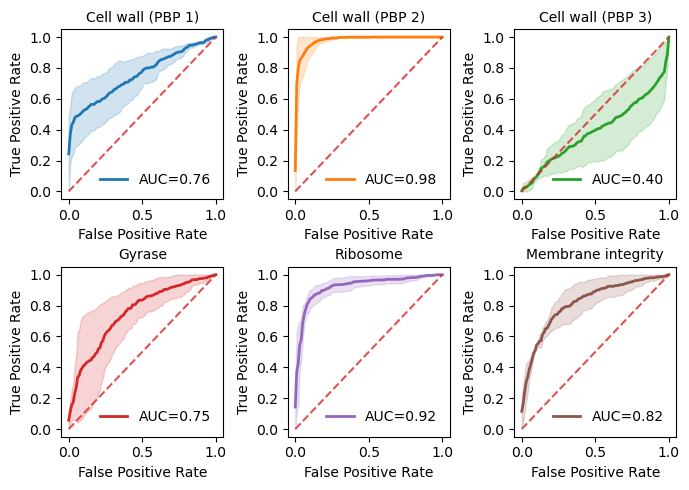

In [15]:
cmpd_name_list = ['Ciprofloxacin', 'Norfloxacin', 'Levofloxacin', 'Colistin', 'PolymyxinB', 'PenicillinG', 'Cefsulodin', 'Sulbactam', 'Mecillinam', 'Avibactam', 'Meropenem', 'Clavulanate', 'Relebactam', 'Cefepime', 'Ceftriaxone', 'Aztreonam', 'Doxycycline', 'Kanamycin', 'Clarithromycin', 'Chloramphenicol']

moa_name_list = ['Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity']

addtnl_dropped_cmpds_list = [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], 
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone']]


clf = LocalOutlierFactor(n_neighbors=9, metric='cosine', novelty=True, p=2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7,5))


for ax_coords, m_idx, m_n, clr in zip([(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)], [2,3,4,0,5,1], moa_name_list, ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']):

    ax_i, ax_j = ax_coords
    
    detect_val_fp_all = []
    detect_val_tp_all = []
    ### Identify outliers in dropped compounds to identify true positives ###
    detected_outliers = 0
    num_drugs = 0

    
    for rep in [0,1,2,3]:
        detect_val_tp = []
        detect_val_fp = []
        idx = index([moa_id, mic_id, plate_id], [[m_idx], [0,1,2,3,4], [rep]])
        
        feat_vecs_ = feat_vecs[idx]
        
        moa_labels_ = np.array(moa_labels)[idx]
        labels_ = np.array(labels)[idx]
        labels_as_name_ = np.array(labels_as_name)[idx]
        
        dropped_cmpds = moa_dict_inv[m_n]

        # Choose one random compound from existing dataset
        idx_drop = index([labels_as_name_], [dropped_cmpds + addtnl_dropped_cmpds_list[m_idx]])
        feat_vecs_train = feat_vecs_[~idx_drop]
        labels_train = moa_labels_[~idx_drop]
        
        X_train, X_test, y_train, y_test = train_test_split(feat_vecs_train, labels_train, test_size=0.1, random_state=42)
        
        scaler = StandardScaler(with_std=True)  
        X_all = scaler.fit_transform(feat_vecs_)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)

        clf.fit(X_train)    
    
        for dropped_cmpd_ in dropped_cmpds:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [4], [rep]])
            feat_vecs_ = feat_vecs[idx_]

            labels_as_name_ = np.array(labels_as_name)[idx_]

            X_all = scaler.transform(feat_vecs_)
            
            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])

            y_pred = clf.decision_function(X_all[idx_drop_])  

            detect_val_tp.append(y_pred)

        for dropped_cmpd_ in addtnl_dropped_cmpds_list[m_idx]:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [4], [rep]])
            feat_vecs_ = feat_vecs[idx_]

            labels_as_name_ = np.array(labels_as_name)[idx_]

            X_all = scaler.transform(feat_vecs_)
            
            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])

            y_pred = clf.decision_function(X_all[idx_drop_])  
            
            detect_val_fp.append(y_pred)
    
        detect_val_tp_all.append(detect_val_tp)
        detect_val_fp_all.append(detect_val_fp)

    print(np.array(detect_val_fp_all).shape, np.array(detect_val_tp_all).shape)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (fp, tp) in enumerate(zip(np.array(detect_val_fp_all).reshape(4,-1), np.array(detect_val_tp_all).reshape(4,-1))):
        fp = list(-1*fp)
        tp = list(-1*tp)
        y_score = np.array(fp + tp)
        y_true = np.array([0] * len(fp) + [1] * len(tp))
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        # plt.plot(fpr, tpr, lw=1, alpha=0.5,
        #          label=f'Plate {i + 1} (AUC={roc_auc:.2f})')

    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[ax_i, ax_j].plot(mean_fpr, mean_tpr,
             label=f'AUC={mean_auc:0.2f}', #$\pm${std_auc:0.2f}
             lw=2, alpha=1, color=clr)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[ax_i, ax_j].fill_between(mean_fpr, tprs_lower, tprs_upper, alpha=0.2, color=clr) #label=r'$\pm$ 1 std. dev.')

    
    ax[ax_i, ax_j].plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='tab:red',alpha=.8) #             label='Random classifier', 

    ax[ax_i, ax_j].set_xlim([-0.05, 1.05])
    ax[ax_i, ax_j].set_ylim([-0.05, 1.05])
    ax[ax_i, ax_j].set_xlabel('False Positive Rate')
    ax[ax_i, ax_j].set_ylabel('True Positive Rate')
    ax[ax_i, ax_j].set_title(f'{m_n}', fontsize=10)
    ax[ax_i, ax_j].legend(loc="lower right", frameon=False, fontsize=10)
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# plt.savefig('novelty_detection_roc_curves.svg')
plt.show()


In [16]:
from sklearn.neighbors import LocalOutlierFactor

cmpd_name_list = ['Ciprofloxacin', 'Norfloxacin', 'Levofloxacin', 'Colistin', 'PolymyxinB', 'PenicillinG', 'Cefsulodin', 'Sulbactam', 'Mecillinam', 'Avibactam', 'Meropenem', 'Clavulanate', 'Relebactam', 'Cefepime', 'Ceftriaxone', 'Aztreonam', 'Doxycycline', 'Kanamycin', 'Clarithromycin', 'Chloramphenicol']

moa_name_list = ['Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity']

addtnl_dropped_cmpds_list = [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], 
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone']]


clf = LocalOutlierFactor(n_neighbors=9, metric='cosine', novelty=True, p=2)

detect_val_fp_all = []
detect_val_tp_all = []
detected_cmpd_name_all = []


for rep in [0,1,2,3]:

    detect_val_tp = []
    detected_cmpd_name = []
    ### Identify outliers in dropped compounds to identify true positives ###
    detected_outliers = 0
    num_drugs = 0
    
    for m_idx, m_n in zip([2,3,4,0,5,1], moa_name_list):
    
        idx = index([moa_id, mic_id, plate_id], [[m_idx], [0,1,2,3,4], [rep]])
        
        feat_vecs_ = feat_vecs[idx]
        
        moa_labels_ = np.array(moa_labels)[idx]
        labels_ = np.array(labels)[idx]
        labels_as_name_ = np.array(labels_as_name)[idx]
        
        dropped_cmpds = moa_dict_inv[m_n]
        
        idx_drop = index([labels_as_name_], [dropped_cmpds + addtnl_dropped_cmpds_list[m_idx]])
        
        feat_vecs_train = feat_vecs_[~idx_drop]
        labels_train = moa_labels_[~idx_drop]
        
        X_train, X_test, y_train, y_test = train_test_split(feat_vecs_train, labels_train, test_size=0.1, random_state=42)
        
        scaler = StandardScaler()  
        X_all = scaler.fit_transform(feat_vecs_)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)

        clf.fit(X_train)
        
        y_pred = clf.predict(X_test)  
    
    
        for dropped_cmpd_ in dropped_cmpds:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [0,4], [rep]])
            feat_vecs_ = feat_vecs[idx_]
            # feat_vecs_ = pca.transform(feat_vecs[idx_])

            labels_as_name_ = np.array(labels_as_name)[idx_]

            X_all = scaler.transform(feat_vecs_)

            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])

            y_pred = clf.predict(X_all[idx_drop_])  

            detect_val = list(y_pred).count(-1) / len(list(y_pred))

            detect_val_tp.append(detect_val)
            detected_cmpd_name.append(dropped_cmpd_)
    
    detect_val_tp_all.append(detect_val_tp)
    detected_cmpd_name_all.append(detected_cmpd_name)

In [17]:
detect_val_matrix = np.zeros((4, len(detect_val_tp_all[0])))

for i in range(4):
    detect_val_matrix[i,:] = detect_val_tp_all[i]

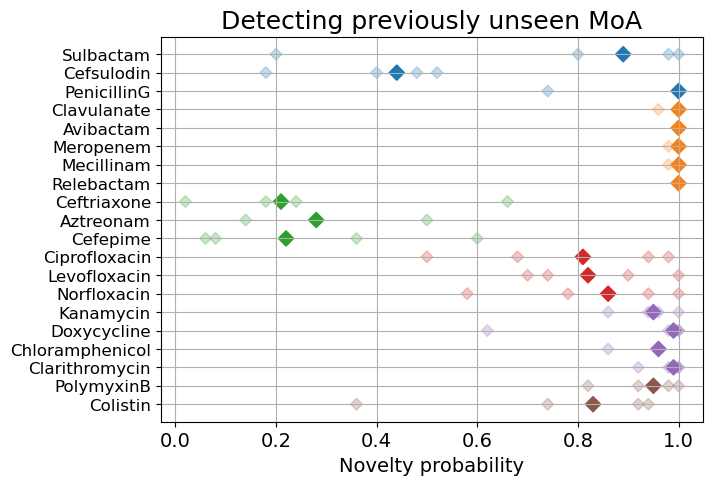

In [18]:
plt.figure(figsize=(7,5))
clr_list = ['tab:blue'] * 3 + ['tab:orange'] * 5 + ['tab:green'] * 3 + ['tab:red'] * 3 + ['tab:purple'] * 4 +  ['tab:brown'] * 2

plt.scatter(np.median(detect_val_matrix, axis=0), [i for i in range(20)], marker='D', color=clr_list, s=60, label='MoA not in trainin data')
for p in range(4):
    plt.scatter(detect_val_matrix[p], [i for i in range(20)], alpha=0.25, marker='D', color=clr_list)

plt.yticks([i for i in range(20)], detected_cmpd_name_all[p], fontsize=12)
plt.xticks(fontsize=14)
plt.grid('on')
plt.xlabel('Novelty probability', fontsize=14)
plt.gca().invert_yaxis()
plt.title(f'Detecting previously unseen MoA', fontsize=18)
plt.savefig('novelty_probability_plot.svg')
plt.show()

In [71]:
from sklearn.neighbors import LocalOutlierFactor

cmpd_name_list = ['Ciprofloxacin', 'Norfloxacin', 'Levofloxacin', 'Colistin', 'PolymyxinB', 'PenicillinG', 'Cefsulodin', 'Sulbactam', 'Mecillinam', 'Avibactam', 'Meropenem', 'Clavulanate', 'Relebactam', 'Cefepime', 'Ceftriaxone', 'Aztreonam', 'Doxycycline', 'Kanamycin', 'Clarithromycin', 'Chloramphenicol']

moa_name_list = ['Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity']

addtnl_dropped_cmpds_list = [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], 
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone']]


clf = LocalOutlierFactor(n_neighbors=9, metric='cosine', novelty=True, p=2)

detect_val_fp_all = []
detect_val_tp_all = []
detected_cmpd_name_all = []


for rep in [1]:

    detect_val_tp = []
    detected_cmpd_name = []
    ### Identify outliers in dropped compounds to identify true positives ###
    detected_outliers = 0
    num_drugs = 0
    
    # for m_idx, m_n in zip([2,3,4,0,5,1], moa_name_list):

    for m_idx, m_n in zip([3], [moa_name_list[1]]):

        
        idx = index([moa_id, mic_id, plate_id], [[m_idx], [0,1,2,3,4], [rep]])
        
        feat_vecs_ = feat_vecs[idx]
        
        moa_labels_ = np.array(moa_labels)[idx]
        labels_ = np.array(labels)[idx]
        labels_as_name_ = np.array(labels_as_name)[idx]
        
        dropped_cmpds = moa_dict_inv[m_n]
        
        idx_drop = index([labels_as_name_], [dropped_cmpds + addtnl_dropped_cmpds_list[m_idx]])
        
        feat_vecs_train = feat_vecs_[~idx_drop]
        labels_train = moa_labels_[~idx_drop]

        X_train, X_test, y_train, y_test = train_test_split(feat_vecs_train, labels_train, test_size=0.1, random_state=42)
        
        scaler = StandardScaler()  
        X_all = scaler.fit_transform(feat_vecs_)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)

        print(X_all.shape, moa_labels_.shape)
        
        clf.fit(X_train)
        
        y_pred = clf.predict(X_test)  
    
    
        for dropped_cmpd_ in dropped_cmpds:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [0,4], [rep]])
            feat_vecs_ = feat_vecs[idx_]
            # feat_vecs_ = pca.transform(feat_vecs[idx_])

            labels_as_name_ = np.array(labels_as_name)[idx_]

            X_all_ = scaler.transform(feat_vecs_)

            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])

            y_pred = clf.predict(X_all_[idx_drop_])  

            detect_val = list(y_pred).count(-1) / len(list(y_pred))

            detect_val_tp.append(detect_val)
            detected_cmpd_name.append(dropped_cmpd_)
    
    detect_val_tp_all.append(detect_val_tp)
    detected_cmpd_name_all.append(detected_cmpd_name)

(4600, 1280) (4600,)


In [72]:
import umap 

umap_ = umap.UMAP(n_components=2, random_state=1, n_neighbors=25, min_dist=0.3, metric='cosine')
# umap_ = umap.UMAP(n_components=n_components)
print(X_all.shape)
X = umap_.fit_transform(X_all)

(4600, 1280)


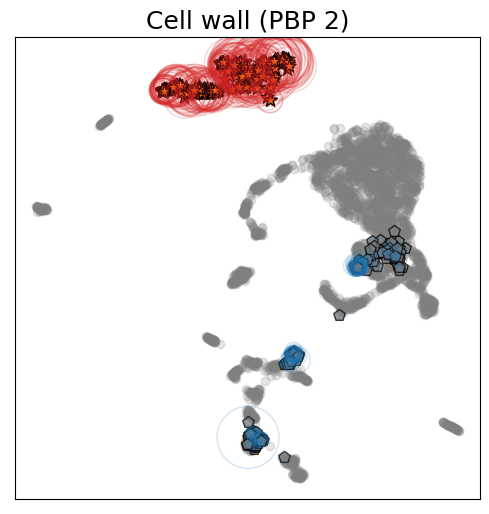

In [73]:
# Scatter plot of all reference compounds 

# Add highest concentration
# Add outlier scores
plt.figure(figsize=(6,6))

moa_classes = ['Control', 'Cell wall (PBP 1)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity', 'RNA polymerase', 'DNA synthesis']

for m_idx, m_n, clr in zip([0,1,3,4,5,6,7,8], moa_classes, ['gainsboro', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive']):

    idx_ref = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[m_idx], [0,1,2,3,4], [1]])
    X_ref = X[idx_ref]
    plt.scatter(X_ref[:,0], X_ref[:,1], color='tab:grey', alpha=0.2)


idx_moa_drop = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[2], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_moa_drop]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_moa_drop = X[idx_moa_drop]

plt.scatter(X_moa_drop[:,0], X_moa_drop[:,1], color='tab:orange', alpha=1, label='PBP 2 (unseen)', marker='*', s=100, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_moa_drop[:, 0],
    X_moa_drop[:, 1],
    s=2000 * radius,
    edgecolors="tab:red",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores",
    alpha=0.2
)

idx_neg_ctrl = index([np.array(labels_as_name)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_neg_ctrl]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_neg_ctrl = X[idx_neg_ctrl]

plt.scatter(X_neg_ctrl[:,0], X_neg_ctrl[:,1], color='tab:grey', alpha=0.75, label='Negative control', marker='p', s=75, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_neg_ctrl[:, 0],
    X_neg_ctrl[:, 1],
    s=2000 * radius,
    edgecolors="tab:blue",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores",
    alpha=0.2
)

# plt.legend(frameon=False)
plt.xticks([])
plt.yticks([])
plt.title('Cell wall (PBP 2)', fontsize=18)
plt.savefig('lof_plot_pbp2.svg')
plt.show()


(4600, 1280) (4600,)
(4600, 1280)


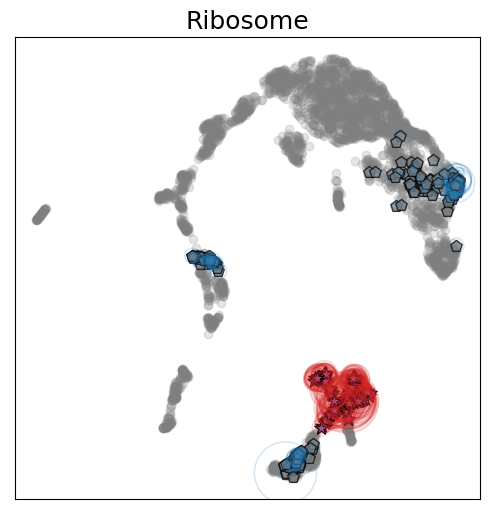

In [98]:
# Scatter plot of all reference compounds 

# Add highest concentration
# Add outlier scores

from sklearn.neighbors import LocalOutlierFactor

cmpd_name_list = ['Ciprofloxacin', 'Norfloxacin', 'Levofloxacin', 'Colistin', 'PolymyxinB', 'PenicillinG', 'Cefsulodin', 'Sulbactam', 'Mecillinam', 'Avibactam', 'Meropenem', 'Clavulanate', 'Relebactam', 'Cefepime', 'Ceftriaxone', 'Aztreonam', 'Doxycycline', 'Kanamycin', 'Clarithromycin', 'Chloramphenicol']

moa_name_list = ['Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity']

addtnl_dropped_cmpds_list = [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], 
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone']]


clf = LocalOutlierFactor(n_neighbors=9, metric='cosine', novelty=True, p=2)

detect_val_fp_all = []
detect_val_tp_all = []
detected_cmpd_name_all = []


for rep in [1]:

    detect_val_tp = []
    detected_cmpd_name = []
    ### Identify outliers in dropped compounds to identify true positives ###
    detected_outliers = 0
    num_drugs = 0
    
    # for m_idx, m_n in zip([2,3,4,0,5,1], moa_name_list):

    for m_idx, m_n in zip([5], [moa_name_list[4]]):

        
        idx = index([moa_id, mic_id, plate_id], [[m_idx], [0,1,2,3,4], [rep]])
        
        feat_vecs_ = feat_vecs[idx]
        
        moa_labels_ = np.array(moa_labels)[idx]
        labels_ = np.array(labels)[idx]
        labels_as_name_ = np.array(labels_as_name)[idx]
        
        dropped_cmpds = moa_dict_inv[m_n]
        
        idx_drop = index([labels_as_name_], [dropped_cmpds + addtnl_dropped_cmpds_list[m_idx]])
        
        feat_vecs_train = feat_vecs_[~idx_drop]
        labels_train = moa_labels_[~idx_drop]

        X_train, X_test, y_train, y_test = train_test_split(feat_vecs_train, labels_train, test_size=0.1, random_state=42)
        
        scaler = StandardScaler()  
        X_all = scaler.fit_transform(feat_vecs_)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)

        print(X_all.shape, moa_labels_.shape)
        
        clf.fit(X_train)
        
        y_pred = clf.predict(X_test)  
    
    
        for dropped_cmpd_ in dropped_cmpds:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [0,4], [rep]])
            feat_vecs_ = feat_vecs[idx_]
            # feat_vecs_ = pca.transform(feat_vecs[idx_])

            labels_as_name_ = np.array(labels_as_name)[idx_]

            X_all_ = scaler.transform(feat_vecs_)

            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])

            y_pred = clf.predict(X_all_[idx_drop_])  

            detect_val = list(y_pred).count(-1) / len(list(y_pred))

            detect_val_tp.append(detect_val)
            detected_cmpd_name.append(dropped_cmpd_)
    
    detect_val_tp_all.append(detect_val_tp)
    detected_cmpd_name_all.append(detected_cmpd_name)

umap_ = umap.UMAP(n_components=2, random_state=1, n_neighbors=25, min_dist=0.3, metric='cosine')
# umap_ = umap.UMAP(n_components=n_components)
print(X_all.shape)
X = umap_.fit_transform(X_all)

plt.figure(figsize=(6,6))

moa_classes = ['Control', 'Cell wall (PBP 1)', 'Cell wall (PBP 2)' 'Cell wall (PBP 3)', 'Gyrase', 'Membrane integrity', 'RNA polymerase', 'DNA synthesis']

for m_idx, m_n, clr in zip([0,1,2,3,4,6,7,8], moa_classes, ['gainsboro', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:pink', 'tab:olive']):

    idx_ref = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[m_idx], [0,1,2,3,4], [1]])
    X_ref = X[idx_ref]
    plt.scatter(X_ref[:,0], X_ref[:,1], color='tab:grey', alpha=0.2)


idx_moa_drop = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[5], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_moa_drop]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_moa_drop = X[idx_moa_drop]

plt.scatter(X_moa_drop[:,0], X_moa_drop[:,1], color='tab:purple', alpha=1, label='Ribosome (unseen)', marker='*', s=100, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_moa_drop[:, 0],
    X_moa_drop[:, 1],
    s=2000 * radius,
    edgecolors="tab:red",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores",
    alpha=0.2
)

idx_neg_ctrl = index([np.array(labels_as_name)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone'], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_neg_ctrl]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_neg_ctrl = X[idx_neg_ctrl]

plt.scatter(X_neg_ctrl[:,0], X_neg_ctrl[:,1], color='tab:grey', alpha=0.75, label='Negative control', marker='p', s=75, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_neg_ctrl[:, 0],
    X_neg_ctrl[:, 1],
    s=2000 * radius,
    edgecolors="tab:blue",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores",
    alpha=0.2
)

# plt.legend(frameon=False)
plt.xticks([])
plt.yticks([])
plt.title('Ribosome', fontsize=18)
plt.savefig('lof_plot_ribo.svg')

plt.show()


(4600, 1280) (4600,)
Levofloxacin
Norfloxacin
Ciprofloxacin
(4600, 1280)


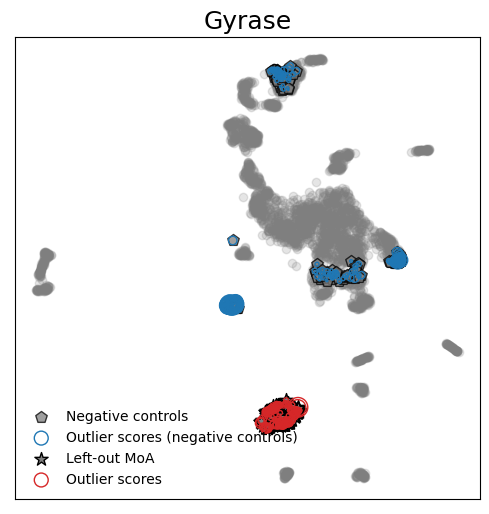

In [103]:
# Scatter plot of all reference compounds 

# Add highest concentration
# Add outlier scores

from sklearn.neighbors import LocalOutlierFactor

cmpd_name_list = ['Ciprofloxacin', 'Norfloxacin', 'Levofloxacin', 'Colistin', 'PolymyxinB', 'PenicillinG', 'Cefsulodin', 'Sulbactam', 'Mecillinam', 'Avibactam', 'Meropenem', 'Clavulanate', 'Relebactam', 'Cefepime', 'Ceftriaxone', 'Aztreonam', 'Doxycycline', 'Kanamycin', 'Clarithromycin', 'Chloramphenicol']

moa_name_list = ['Cell wall (PBP 1)', 'Cell wall (PBP 2)', 'Cell wall (PBP 3)', 'Gyrase', 'Ribosome', 'Membrane integrity']

addtnl_dropped_cmpds_list = [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], 
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Ceftriaxone', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Doxycycline'],
                             ['Ciprofloxacin', 'Cefsulodin', 'Relebactam', 'Ceftriaxone']]


clf = LocalOutlierFactor(n_neighbors=9, metric='cosine', novelty=True, p=2)

detect_val_fp_all = []
detect_val_tp_all = []
detected_cmpd_name_all = []


for rep in [1]:

    detect_val_tp = []
    detected_cmpd_name = []
    ### Identify outliers in dropped compounds to identify true positives ###
    detected_outliers = 0
    num_drugs = 0
    
    # for m_idx, m_n in zip([2,3,4,0,5,1], moa_name_list):

    for m_idx, m_n in zip([0], [moa_name_list[3]]):

        
        idx = index([moa_id, mic_id, plate_id], [[m_idx], [0,1,2,3,4], [rep]])
        
        feat_vecs_ = feat_vecs[idx]
        
        moa_labels_ = np.array(moa_labels)[idx]
        labels_ = np.array(labels)[idx]
        labels_as_name_ = np.array(labels_as_name)[idx]
        
        dropped_cmpds = moa_dict_inv[m_n]
        
        idx_drop = index([labels_as_name_], [dropped_cmpds + addtnl_dropped_cmpds_list[m_idx]])
        
        feat_vecs_train = feat_vecs_[~idx_drop]
        labels_train = moa_labels_[~idx_drop]

        X_train, X_test, y_train, y_test = train_test_split(feat_vecs_train, labels_train, test_size=0.1, random_state=42)
        
        scaler = StandardScaler()  
        X_all = scaler.fit_transform(feat_vecs_)
        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)

        print(X_all.shape, moa_labels_.shape)
        
        clf.fit(X_train)
        
        y_pred = clf.predict(X_test)  
    
    
        for dropped_cmpd_ in dropped_cmpds:
            idx_ = index([moa_id, mic_id, plate_id], [[m_idx], [0,4], [rep]])
            feat_vecs_ = feat_vecs[idx_]
            # feat_vecs_ = pca.transform(feat_vecs[idx_])

            labels_as_name_ = np.array(labels_as_name)[idx_]
            X_all_ = scaler.transform(feat_vecs_)

            idx_drop_ = index([labels_as_name_], [[dropped_cmpd_]])
            print(dropped_cmpd_)

            y_pred = clf.predict(X_all_[idx_drop_])  

            detect_val = list(y_pred).count(-1) / len(list(y_pred))

            detect_val_tp.append(detect_val)
            detected_cmpd_name.append(dropped_cmpd_)
    
    detect_val_tp_all.append(detect_val_tp)
    detected_cmpd_name_all.append(detected_cmpd_name)

umap_ = umap.UMAP(n_components=2, random_state=1, n_neighbors=25, min_dist=0.3, metric='cosine')
# umap_ = umap.UMAP(n_components=n_components)
print(X_all.shape)
X = umap_.fit_transform(X_all)

plt.figure(figsize=(6,6))

moa_classes = ['Control', 'Cell wall (PBP 1)', 'Cell wall (PBP 2)' 'Cell wall (PBP 3)', 'Ribosome', 'Membrane integrity', 'RNA polymerase', 'DNA synthesis']

for m_idx, m_n, clr in zip([0,1,2,3,6,7,8], moa_classes, ['gainsboro', 'tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:pink', 'tab:olive']):

    idx_ref = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[m_idx], [0,1,2,3,4], [1]])
    X_ref = X[idx_ref]
    plt.scatter(X_ref[:,0], X_ref[:,1], color='tab:grey', alpha=0.2)



idx_neg_ctrl = index([np.array(labels_as_name)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [['Cefsulodin', 'Relebactam', 'Ceftriaxone', 'Doxycycline'], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_neg_ctrl]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_neg_ctrl = X[idx_neg_ctrl]

plt.scatter(X_neg_ctrl[:,0], X_neg_ctrl[:,1], color='tab:grey', alpha=0.75, label='Negative controls', marker='p', s=75, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_neg_ctrl[:, 0],
    X_neg_ctrl[:, 1],
    s=200 * radius,
    edgecolors="tab:blue",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores (negative controls)",
    alpha=1
)


idx_moa_drop = index([np.array(moa_labels)[idx], np.array(mic_id)[idx], np.array(plate_id)[idx]], [[4], [0,4], [1]])

X_scores = clf.score_samples(X_all)[idx_moa_drop]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

X_moa_drop = X[idx_moa_drop]

plt.scatter(X_moa_drop[:,0], X_moa_drop[:,1], color='tab:grey', alpha=1, label='Left-out MoA', marker='*', s=100, edgecolor='black', linewidth=1)

scatter = plt.scatter(
    X_moa_drop[:, 0],
    X_moa_drop[:, 1],
    s=200 * radius,
    edgecolors="tab:red",
    facecolors="none",
    linestyle='solid',
    label="Outlier scores",
    alpha=1
)


plt.legend(frameon=False)
plt.xticks([])
plt.yticks([])
plt.title('Gyrase', fontsize=18)
plt.savefig('lof_plot_gyrase.svg')
plt.show()
